In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
list_data = [ 'januari-2021.csv', 'februari-2021.csv', 'maret-2021.csv',
              'april-2021.csv', 'mei-2021.csv', 'juni-2021.csv',
              'juli-2021.csv', 'agustus-2021.csv', 'september-2021.csv',
              'oktober-2021.csv', 'november-2021.csv', 'desember-2021.csv' ]

local = "../data/"
if os.path.isdir(local):
    main_dir = local
else:
    main_dir = "https://raw.githubusercontent.com/Hyuto/skripsi/master/data/"

In [3]:
data = pd.concat([pd.read_csv(f"{main_dir}{x}") for x in list_data])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448642 entries, 0 to 19071
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     448642 non-null  object
 1   content  448642 non-null  object
 2   url      448642 non-null  object
dtypes: object(3)
memory usage: 13.7+ MB


In [4]:
data["date"] = pd.to_datetime(data["date"])
data.drop_duplicates("content", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440780 entries, 0 to 19071
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   date     440780 non-null  datetime64[ns, UTC]
 1   content  440780 non-null  object             
 2   url      440780 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 13.5+ MB


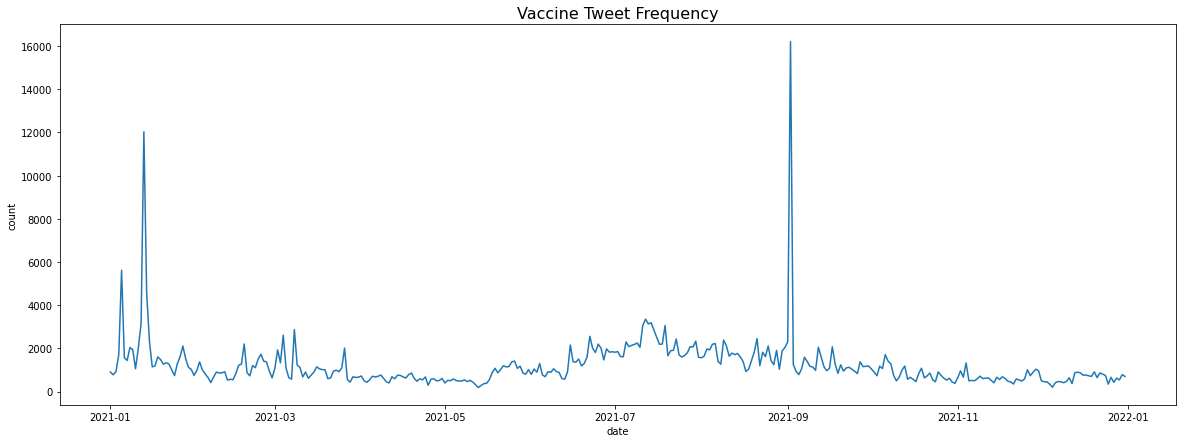

,date,count
0,2021-09-02 00:00:00+00:00,16210
1,2021-01-13 00:00:00+00:00,12031
2,2021-01-05 00:00:00+00:00,5618
3,2021-01-14 00:00:00+00:00,4579
4,2021-07-12 00:00:00+00:00,3356


In [15]:
tweet_freq = data["date"].dt.floor('d').value_counts().rename_axis('date').reset_index(name='count')
plt.figure(figsize=(20,7))
sns.lineplot(x = "date", y = "count", data = tweet_freq)
plt.title("Vaccine Tweet Frequency", fontsize=16)
plt.show()

tweet_freq.sort_values("count", ascending=False).head(5)